In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import analysis as a
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot


****************************************
RUNNING IN DEVELOP
****************************************


In [2]:
# raw_spot_collections = ["2018-01-24_E14_X31",
#                         "2018-01-24_E15_X31",
#                         "2018-01-24_N21_Pan",
#                         "2018-01-24_N22_Cal",
#                         "2018-01-24_N23_X31",
#                         ]
#spots = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=raw_spot_collections)

studies = ["2018-01-24_microarray"]
spots = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)

In [3]:
data = a.Data(spots,mean_on=None)
analysis = a.Analysis(data=data)

In [4]:
performance_tabels = []
for _ in range(2):
    data._safe_random_permuation(data.data, with_in="Block")
    analysis = a.Analysis(data=data)
    performance_tabels += tuple((analysis.performance_table(),))
df = pd.concat(performance_tabels,axis=0)
    

/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/

In [5]:
performace_mean = df.groupby(df.index).mean()    
performace_mean["Name"] = performance_tabels[0]["Name"]
performace_mean

,unweighted accuracy,true positive,false positive,true negative,false negative,Name
0,83.333333,83.333333,16.666667,91.666667,8.333333,Nearest Neighbors
1,86.666667,90.000000,10.000000,95.000000,5.000000,Decision Tree
2,93.333333,93.750000,6.250000,98.275862,1.724138,Random Forest
3,83.333333,86.160714,13.839286,93.548387,6.451613,AdaBoost
4,40.000000,64.583333,35.416667,75.880426,24.119574,Naive Bayes
5,50.000000,60.294118,39.705882,83.531746,16.468254,LDA


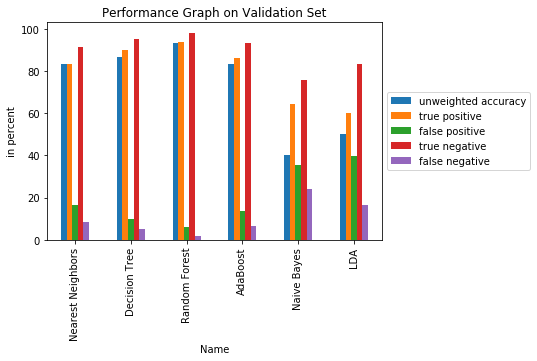

In [6]:
performace_mean.plot.bar("Name")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance Graph on Validation Set')
plt.ylabel('in percent')
#plt.savefig('performance_validators_on_unprocest_shuffeld_data.png',bbox_inches='tight')
plt.show()